<a href="https://colab.research.google.com/github/Coraliefringeli/2025_Intro_Python_Fringeli_Coralie/blob/main/notebook/W3_S2_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Geospatial Data with Geopandas

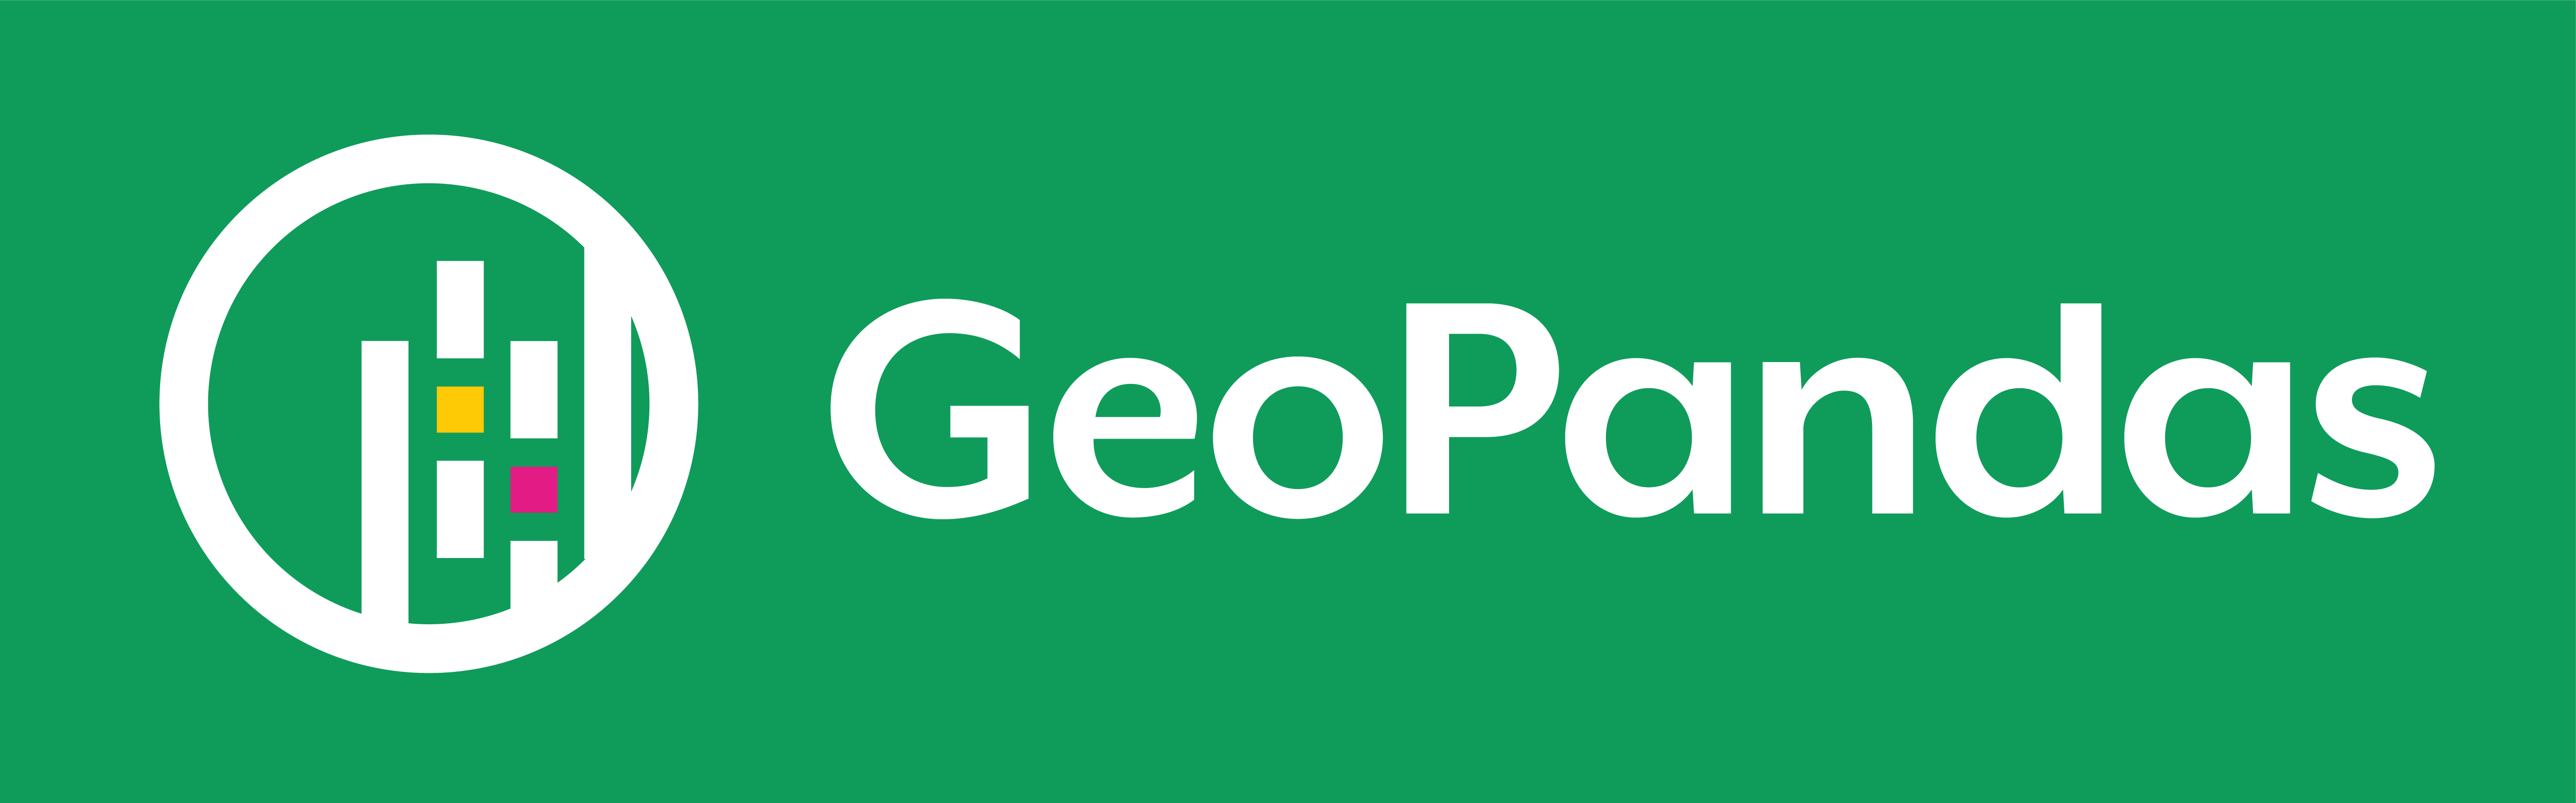

## Installing GeoPandas
Please run the following code blocks in this section to:
* Install the GeoPandas's dependencies and GeoPandas
* Download and unzip the data used in this notebook
* Import GeoPandas and other required modules for the notebook

In [1]:
#Install the GeoPandas's dependencies
!pip install --upgrade pyshp

!pip install --upgrade shapely

!pip install --upgrade descartes

!pip install --upgrade rtree

!pip install --upgrade fiona --only-binary all

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: pyshp
    Found existing installation: pyshp 2.3.1
    Uninstalling pyshp-2.3.1:
      Successfully uninstalled pyshp-2.3.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.6/507.6 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.2/17.2 MB 68.0 MB/s eta 0:00:00


In [2]:
#Install the GeoPandas

!pip install --upgrade geopandas

In [3]:
#Import GeoPandas and other required modules for the notebook
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')





References:    
1. Geopandas official website: Introduction to GeoPandas
https://geopandas.org/en/stable/getting_started/introduction.html   
2. Automating GIS process
https://autogis-site.readthedocs.io/en/latest/notebooks/L2/01-geopandas-basics.html    
3. Use Data for Earth and Environmental Science in Open Source Python
https://www.earthdatascience.org/courses/use-data-open-source-python/
4. The Shapely User Manual
https://shapely.readthedocs.io/en/stable/manual.html
5. Geospatial Analysis with Python and R
https://kodu.ut.ee/~kmoch/geopython2020/index.html
6. Introduction to Geospatial Data in Python
https://www.datacamp.com/tutorial/geospatial-data-python

**Learning goals**

1. Understand the data structure of GeoPandas
2. Read and write geospatial data with GeoPandas
3. Access geospatial data attributes and methods using GeoPandas
4. Perform spatial operations with GeoPandas

**GeoPandas** extends the data science library pandas for geospatial data by combining:
* **Pandas**: data analysis
* **Shapely**: handle geometries (Deterministic spatial analysis - set theoretic manipulations of planar features)
* **Fiona**: read and write files
* **pyproj**: manage coordinate reference systems
* **matplotlib**: plotting.


## Geopandas Data Structure
* The main difference between GeoDataFrame and DataFrame is that GeoDataFrame contains at least one column **'geometry'**, which contains shapely objects, e.g. points, lines, polygons, multipolygons, etc.

In [4]:
### Create a GeoPandas GEODATAFRAME FROM a Pandas DATAFRAME with coordiantes
import urllib.request

#df_earthquakes_path contient le chemin local du fichier CSV téléchargé et décompressé.
df_earthquakes_path = pooch.retrieve('https://unils-my.sharepoint.com/:u:/g/personal/tom_beucler_unil_ch/EfeMaclt07pCnbT4tQgz0VsBWJHSZqv_qWptYWjzvUeGXw?download=1',
                          known_hash='aea2448a8b13480c9862de53da9021ad343ea57304a0fab111bde08e39af492b',
                          processor=pooch.Unzip()
                          )[0] #PREND LE 1ER FICHIER EXTRAIT
                      #POOCH.RETRIEVE(): Télécharge un fichier depuis l’URL donnée.

# Create Pandas DataFrame from csv used in the Pandas exercise
df_earthquakes = pd.read_csv(df_earthquakes_path)

Unzipping contents of '/root/.cache/pooch/7231bbbcd8bae63c0f676170b868f161-EfeMaclt07pCnbT4tQgz0VsBWJHSZqv_qWptYWjzvUeGXw' to '/root/.cache/pooch/7231bbbcd8bae63c0f676170b868f161-EfeMaclt07pCnbT4tQgz0VsBWJHSZqv_qWptYWjzvUeGXw.unzip'


In [ ]:
#Have a look at the Pandas DataFrame
df_earthquakes.head(2)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,2014-01-31 23:53:37.000,60.2520,-152.7081,90.2,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.0703,-115.1309,0.0,1.33,ml,4.0,171.43,0.342,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake


In [5]:
# Create GeoPandas GeoDataFrame from the Pandas DataFrame
gdf_earthquakes = gpd.GeoDataFrame(df_earthquakes,
                                   geometry=gpd.points_from_xy(df_earthquakes.longitude,
                                                               df_earthquakes.latitude))

In [6]:
# Have a look at the GeoPandas GeoDataFrame and notice the 'geometry' column
gdf_earthquakes.head(2)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,geometry
0,2014-01-31 23:53:37.000,60.2520,-152.7081,90.2,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake,POINT (-152.7081 60.252)
1,2014-01-31 23:48:35.452,37.0703,-115.1309,0.0,1.33,ml,4.0,171.43,0.342,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake,POINT (-115.1309 37.0703)


* The core data structure is **geopandas.GeoDataFrame**, a subclass of pandas.DataFrame.

In [7]:
# See the type of the geodataframe
type(gdf_earthquakes)

geopandas.geodataframe.GeoDataFrame

* **geopandas.GeoSeries** is a subclass of pandas.Series. GeoSeries can contain any geometry type and has a `GeoSeries.crs` attribute (Coordinate Reference System) for projection.

In [8]:
# See the type of a column in the geodataframe
type(gdf_earthquakes['time'])

pandas.core.series.Series

* **GeoDataFrame combines** pandas.Series with traditional data (numerical, boolean, text, etc.) and geopandas.GeoSeries, thus can work with geospatial data.

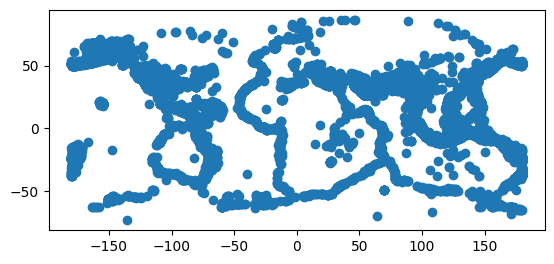

In [9]:
# Take a quick look at the geospatial data contained in the GeoDataFrame on a map
ax = gdf_earthquakes.plot()

## Read and write files

### Reading files
* Assuming you have a file containing both data and geometry (e.g. GeoPackage, GeoJSON, Shapefile), you can read it using `geopandas.read_file()`, which automatically detects the filetype and creates a GeoDataFrame.



In [10]:
gpd_data_path = sorted(pooch.retrieve('https://unils-my.sharepoint.com/:u:/g/personal/tom_beucler_unil_ch/EZS4viTC1MlMnZgSR0k5ZacBn2w6aNaqfq8kt5mtHdXf2A?download=1',\
    known_hash='b92a20144d855ca2f2785da28e52ee78258fcd0b4a60a11a28ee832ac0979cfb',\
        processor=pooch.Unzip()
        )
        )

Unzipping contents of '/root/.cache/pooch/3b01462924bfc74449203f2b7666860d-EZS4viTC1MlMnZgSR0k5ZacBn2w6aNaqfq8kt5mtHdXf2A' to '/root/.cache/pooch/3b01462924bfc74449203f2b7666860d-EZS4viTC1MlMnZgSR0k5ZacBn2w6aNaqfq8kt5mtHdXf2A.unzip'


In [11]:
fishindex = next(i for i, f in enumerate(gpd_data_path) if 'DAMSELFISH_distributions.shp' in f)

In [13]:
# Set filepath
path = gpd_data_path[fishindex]

In [15]:
# Read data into a GeoDataFrame
gdf_DAMSELFISH = gpd.read_file(path)

,ID_NO,BINOMIAL,ORIGIN,COMPILER,YEAR,CITATION,SOURCE,DIST_COMM,ISLAND,SUBSPECIES,...,RL_UPDATE,KINGDOM_NA,PHYLUM_NAM,CLASS_NAME,ORDER_NAME,FAMILY_NAM,GENUS_NAME,SPECIES_NA,CATEGORY,geometry
0,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-115.64375 29.71392, -115.61585 29.6..."
1,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-105.58995 21.8934, -105.56483 21.85..."
2,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-111.15962 19.01536, -111.15948 18.9..."
3,183793.0,Chromis intercrusma,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Chromis,intercrusma,LC,"POLYGON ((-80.865 -0.77894, -80.7593 -0.83337,..."
4,183793.0,Chromis intercrusma,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Chromis,intercrusma,LC,"POLYGON ((-67.33922 -55.6761, -67.33755 -55.67..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,183774.0,Azurina hirundo,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Azurina,hirundo,NT,"POLYGON ((-120.11829 34.47283, -120.10502 34.4..."
227,183774.0,Azurina hirundo,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Azurina,hirundo,NT,"POLYGON ((-117.41363 29.18823, -117.40898 29.1..."
228,183774.0,Azurina hirundo,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Azurina,hirundo,NT,"POLYGON ((-114.63839 28.39008, -114.6366 28.37..."
229,183774.0,Azurina hirundo,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Azurina,hirundo,NT,"POLYGON ((-111.15962 19.01536, -111.15948 18.9..."


### GeoPandas for handing vector format spatial data

* Three fundamental types of **geometric objects** (the spatial data model implemented by shapely & defined by *interior, boundary, and exterior*):
    * **Point**: A single point defined by a pair of x, y coordinates, e.g. locations of trees
        * *Point class*. *Interior* - exactly one point. *Boundary* - exactly no points. *Exterior* - all other points
    * **Line**: At least two connected points, e.g. roads, streams
        * *LineString and LinearRing classes*. *Interior* - the infinitely many points along its length. *Boundary* - Two end points. *Exterior* - all other points.
    * **Polygon**: At least three points connected and closed by lines, e.g. boundaries of lakes, countries.
        * *Polygon class*. *Interior* - the infinitely many points within. *Boundary* - one or more lines. *Exterior* - all other points.  

In [16]:
# Check type of the data
type(gdf_DAMSELFISH)

geopandas.geodataframe.GeoDataFrame

In [17]:
# Take a quick look at the data
gdf_DAMSELFISH.head(3)

,ID_NO,BINOMIAL,ORIGIN,COMPILER,YEAR,CITATION,SOURCE,DIST_COMM,ISLAND,SUBSPECIES,...,RL_UPDATE,KINGDOM_NA,PHYLUM_NAM,CLASS_NAME,ORDER_NAME,FAMILY_NAM,GENUS_NAME,SPECIES_NA,CATEGORY,geometry
0,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-115.64375 29.71392, -115.61585 29.6..."
1,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-105.58995 21.8934, -105.56483 21.85..."
2,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-111.15962 19.01536, -111.15948 18.9..."


In [18]:
# Look at the geometries in the GeoDataFrame
gdf_DAMSELFISH['geometry'].head(3)

,geometry
0,"POLYGON ((-115.64375 29.71392, -115.61585 29.6..."
1,"POLYGON ((-105.58995 21.8934, -105.56483 21.85..."
2,"POLYGON ((-111.15962 19.01536, -111.15948 18.9..."


In [27]:
# See the type of geometric objects in the data
type(gdf_DAMSELFISH.iloc[0]['geometry'])  #.iloc[0]: index de location => là prend infos de la 1ere ligne

shapely.geometry.polygon.Polygon

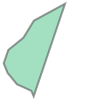

In [32]:
# See the geometric objects in the data
gdf_DAMSELFISH.iloc[4]['geometry']

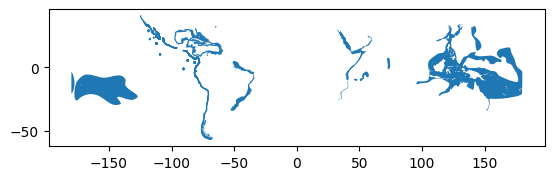

In [33]:
# Take a quick look at the data on a map
ax = gdf_DAMSELFISH.plot()

### Writing files
* To write a GeoDataFrame back to file use GeoDataFrame.to_file(). The default file format is Shapefile, but you can specify your own with the driver keyword.

In [ ]:
# Create a output path for the data
out_file_path = r"./DAMSELFISH_distributions_SELECTION.shp"

# Select first 50 rows, this a the numpy/pandas syntax to ``slice``
# parts out a dataframe or array, from position 0 until (excluding) 50
selection = gdf_DAMSELFISH[0:50]

# Write those rows into a new Shapefile (the default output file format is Shapefile)
selection.to_file(out_file_path)

## Attributes and Methods


### Area and distance

* To measure the area of each polygon (or MultiPolygon in this specific case), access the [`GeoDataFrame.area`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.area.html) attribute, which returns a pandas.Series. Note that `GeoDataFrame.area` is just `GeoSeries.area` applied to the active geometry column.
* The Euclidian distance between points can be accessed using `GeoDataFrame.distance`, which calls [`GeoDataFrame.distance`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.distance.html) to measure the distance from the point of interest


In [42]:
# Calculate and store the areas individual polygons
gdf_DAMSELFISH['area'] = gdf_DAMSELFISH.area #création d'une nouvelle colonne => area
gdf_DAMSELFISH.head(3)

gdf_DAMSELFISH.area.head(3)

,0
0,19.396254
1,6.145902
2,2.697207


### Boundary and centroid

* To get the boundary of each polygon (LineString), access the [`GeoDataFrame.boundary`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.boundary.html)
* The Centroid of a given geometry (line, polygon, etc.) can be accessed via the [`.centroid`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.centroid.html) attribute


In [43]:
# Get the boundary of each polygon
gdf_DAMSELFISH['boundary'] = gdf_DAMSELFISH.boundary
gdf_DAMSELFISH['boundary'].head(3)

,boundary
0,"MULTILINESTRING ((-115.64375 29.71392, -115.61..."
1,"MULTILINESTRING ((-105.58995 21.8934, -105.564..."
2,"MULTILINESTRING ((-111.15962 19.01536, -111.15..."


In [44]:
# Get the centroid of each polygon
gdf_DAMSELFISH['centroid'] = gdf_DAMSELFISH.centroid
gdf_DAMSELFISH['centroid'].head(3)

,centroid
0,POINT (-112.09627 25.66645)
1,POINT (-105.92434 20.42193)
2,POINT (-112.05811 19.00069)


In [45]:
# Measure distance between each centroid and the first centroid
first_point = gdf_DAMSELFISH['centroid'].iloc[0]
gdf_DAMSELFISH['distance'] = gdf_DAMSELFISH['centroid'].distance(first_point)
gdf_DAMSELFISH['distance'].head(3)

,distance
0,0.000000
1,8.099242
2,6.665871


### Projection

* [Coordinate reference systems (CRS)](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.crs.html) are important because the geometric shapes in a GeoDataFrame are simply a collection of coordinates in an arbitrary space. A CRS tells Python how those coordinates related to places on the Earth. A map projection (or a projected coordinate system) is a systematic transformation of the latitudes and longitudes into a plain surface where units are quite commonly represented as meters (instead of decimal degrees).

* As map projections of gis-layers are fairly often defined differently (i.e. they do not match), it is a common procedure to redefine the map projections to be identical in both layers. It is important that the layers have the same projection as it makes it possible to analyze the spatial relationships between layers, such as in conducting the Point in Polygon spatial query.
* The EPSG number (“European Petroleum Survey Group”) is a code that tells about the coordinate system of the dataset.


In [46]:
# Reading the data from the Europe_borders.shp file
europe_index = next(i for i, f in enumerate(gpd_data_path) if 'Europe_borders.shp' in f)
europe_borders_path =  gpd_data_path[europe_index]
gdf_Europe_borders = gpd.read_file(europe_borders_path)

In [47]:
# See the current coordinate reference system from .crs attribute
gdf_Europe_borders.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [48]:
# Convert (aka reproject) into Lambert Azimuthal Equal Area projection (EPSG: 3035)
gdf_Europe_borders_proj = gdf_Europe_borders.to_crs(epsg=3035)

In [49]:
# See the current coordinate reference system from .crs attribute
gdf_Europe_borders_proj.crs

<Projected CRS: EPSG:3035>
Name: ETRS89-extended / LAEA Europe
Axis Info [cartesian]:
- Y[north]: Northing (metre)
- X[east]: Easting (metre)
Area of Use:
- name: Europe - European Union (EU) countries and candidates. Europe - onshore and offshore: Albania; Andorra; Austria; Belgium; Bosnia and Herzegovina; Bulgaria; Croatia; Cyprus; Czechia; Denmark; Estonia; Faroe Islands; Finland; France; Germany; Gibraltar; Greece; Hungary; Iceland; Ireland; Italy; Kosovo; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Monaco; Montenegro; Netherlands; North Macedonia; Norway including Svalbard and Jan Mayen; Poland; Portugal including Madeira and Azores; Romania; San Marino; Serbia; Slovakia; Slovenia; Spain including Canary Islands; Sweden; Switzerland; Türkiye (Turkey); United Kingdom (UK) including Channel Islands and Isle of Man; Vatican City State.
- bounds: (-35.58, 24.6, 44.83, 84.73)
Coordinate Operation:
- name: Europe Equal Area 2001
- method: Lambert Azimuthal Equal Area
Datum: Eur

### Plot

* GeoPandas can plot maps, so we can check how the geometries appear in space. To plot the active geometry, call [GeoDataFrame.plot()](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.plot.html).

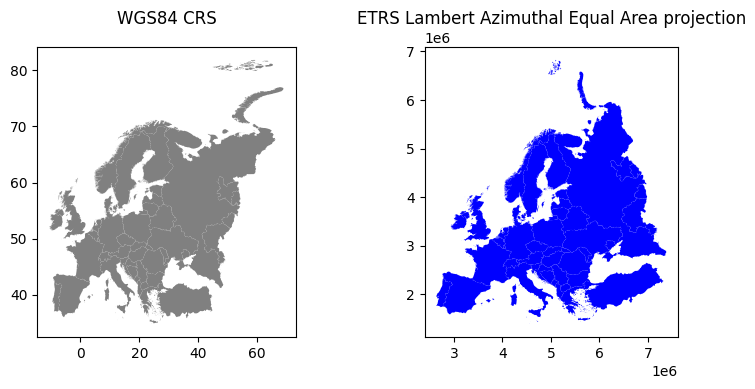

In [51]:
# Plot GeoDataFrames
# Understand the difference between the projections
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
# Plot the WGS84
gdf_Europe_borders.plot(facecolor='gray', ax=axs[0]);

# Add title
axs[0].set_title("WGS84 CRS", y=1.05);

# Plot the one with ETRS-LAEA projection
gdf_Europe_borders_proj.plot(facecolor='blue', ax=axs[1]);

# Add title
axs[1].set_title("ETRS Lambert Azimuthal Equal Area projection", y=1.05);

# Remove empty white space around the plot
fig.tight_layout()

## Spatial Relationships and Operations

## Geometric Manipulations
GeoPandas makes available all the tools for geometric manipulations in the shapely library: buffer, boundary, convex_hull, envelope, unary_union


In [55]:
# Tutorial: https://geopandas.org/en/stable/docs/user_guide/geometric_manipulations.html

# Generate a GeoSeries containing 2000 random points
import numpy as np
from shapely.geometry import Point

#4 valeurs définissent les bornes du rectangle
#dans lequel on veut placer nos points :
xmin, xmax, ymin, ymax = 900000, 1080000, 120000, 280000

#np.random.random(2000):crée un tableau de 2000 nombres ALEATOIRS ENTRE MAX ET MIN
xc = (xmax - xmin) * np.random.random(2000) + xmin
yc = (ymax - ymin) * np.random.random(2000) + ymin

#Créer les OBJETS GEOMETRIQUES (points)
#crée une liste de 2000 objets Point, un pour chaque paire (x, y) :
pts = gpd.GeoSeries([Point(x, y) for x, y in zip(xc, yc)])
                                            #zip (xc,yc) : associe chaque X avec son Y

pts

,0
0,POINT (1061432.876 123779.264)
1,POINT (1047949.718 247005.516)
2,POINT (938896.971 271208.271)
3,POINT (1012877.933 265263.614)
4,POINT (1054109.408 222331.155)
...,...
1995,POINT (1047688.464 144532.281)
1996,POINT (971582.904 210233.968)
1997,POINT (1021435.643 160060.268)
1998,POINT (1029208.938 187639.811)


In [62]:
# Draw a circle with fixed radius around each point
circles = pts.buffer(2000)

In [64]:
# Collapse these circles into a single MultiPolygon geometry with unary_union
# https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.unary_union.html
mp = circles.unary_union

In [65]:
# See unified multipolygon
mp

In [66]:
# Check the type of the unified multipolygon
type(mp)

shapely.geometry.multipolygon.MultiPolygon

### Set-Operations with Overlay

When working with multiple spatial datasets – especially multiple polygon or line datasets – users often wish to create new shapes based on places where those datasets overlap (or don’t overlap). These manipulations are often referred using the language of sets – intersections, unions, and differences. These types of operations are made available in the geopandas library through the [overlay()](https://geopandas.org/en/stable/docs/user_guide/set_operations.html?highlight=overlay) method.

<Axes: >

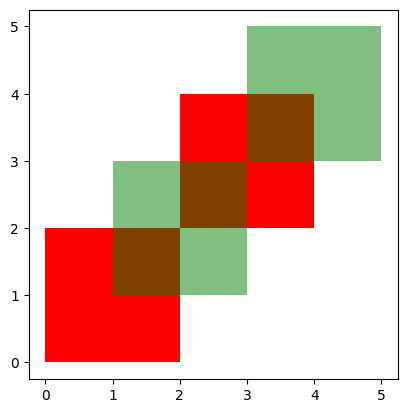

In [69]:
# Tutorial: https://geopandas.org/en/stable/docs/user_guide/set_operations.html
# Create some example data
from shapely.geometry import Polygon

polys1 = gpd.GeoSeries([Polygon([(0,0), (2,0), (2,2), (0,2)]),
                              Polygon([(2,2), (4,2), (4,4), (2,4)])])


polys2 = gpd.GeoSeries([Polygon([(1,1), (3,1), (3,3), (1,3)]),
                              Polygon([(3,3), (5,3), (5,5), (3,5)])])


df1 = gpd.GeoDataFrame({'geometry': polys1, 'df1':[1,2]})

df2 = gpd.GeoDataFrame({'geometry': polys2, 'df2':[1,2]})

ax = df1.plot(color='red');

df2.plot(ax=ax, color='green', alpha=0.5)

In [70]:
# The overlay() method with how='intersection', it returns only those geometries that are contained by both GeoDataFrames:
res_intersection = df1.overlay(df2, how='intersection')

<Axes: >

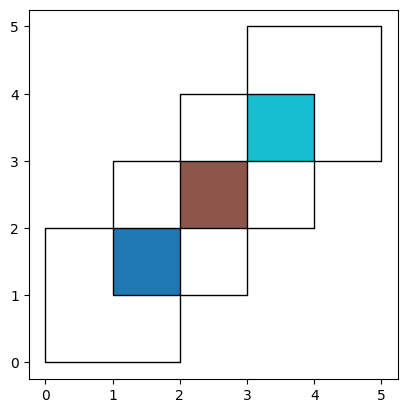

In [73]:
# Plot and check the result of the overlay
ax = res_intersection.plot(cmap='tab10')

df1.plot(ax=ax, facecolor='none', edgecolor='k');

df2.plot(ax=ax, facecolor='none', edgecolor='k')